Heart disease prediction 

In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

from joblib import dump, load

In [2]:
if __name__ == '__main__':
    dataset = pd.read_csv("D:\Work\OTHER\ML_disease_prediction\Data Sets\heart-disease-uci\heart.csv")
    #dataset.info()
    dataset_top = dataset.head(n=2)

In [3]:
    dataset_top

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
    #dataset.shape

Split data set into data and predicted values

In [5]:
    data = dataset.loc[:,'age':'thal']
    target = dataset.target

Split dataset into training set and test set
70% training and 30% test

In [20]:
    X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.3,random_state=109) 


    new_test_data = dataset.loc[200,'age':'thal']
    target_new_test_data = dataset.loc[200, :]

In [21]:
    X_test.head(n=2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2


Decision tree classifier

In [22]:
    clf2 = tree.DecisionTreeClassifier()
    clf2 = clf2.fit(X_train, y_train)

In [23]:
    y_pred_tree = clf2.predict(X_test)
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.7802197802197802


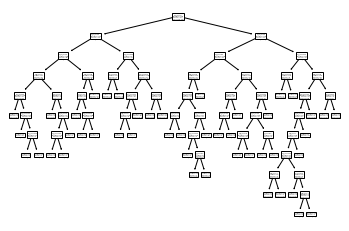

In [24]:
    #tree_diagram = tree.plot_tree(clf2.fit(data, target)) 

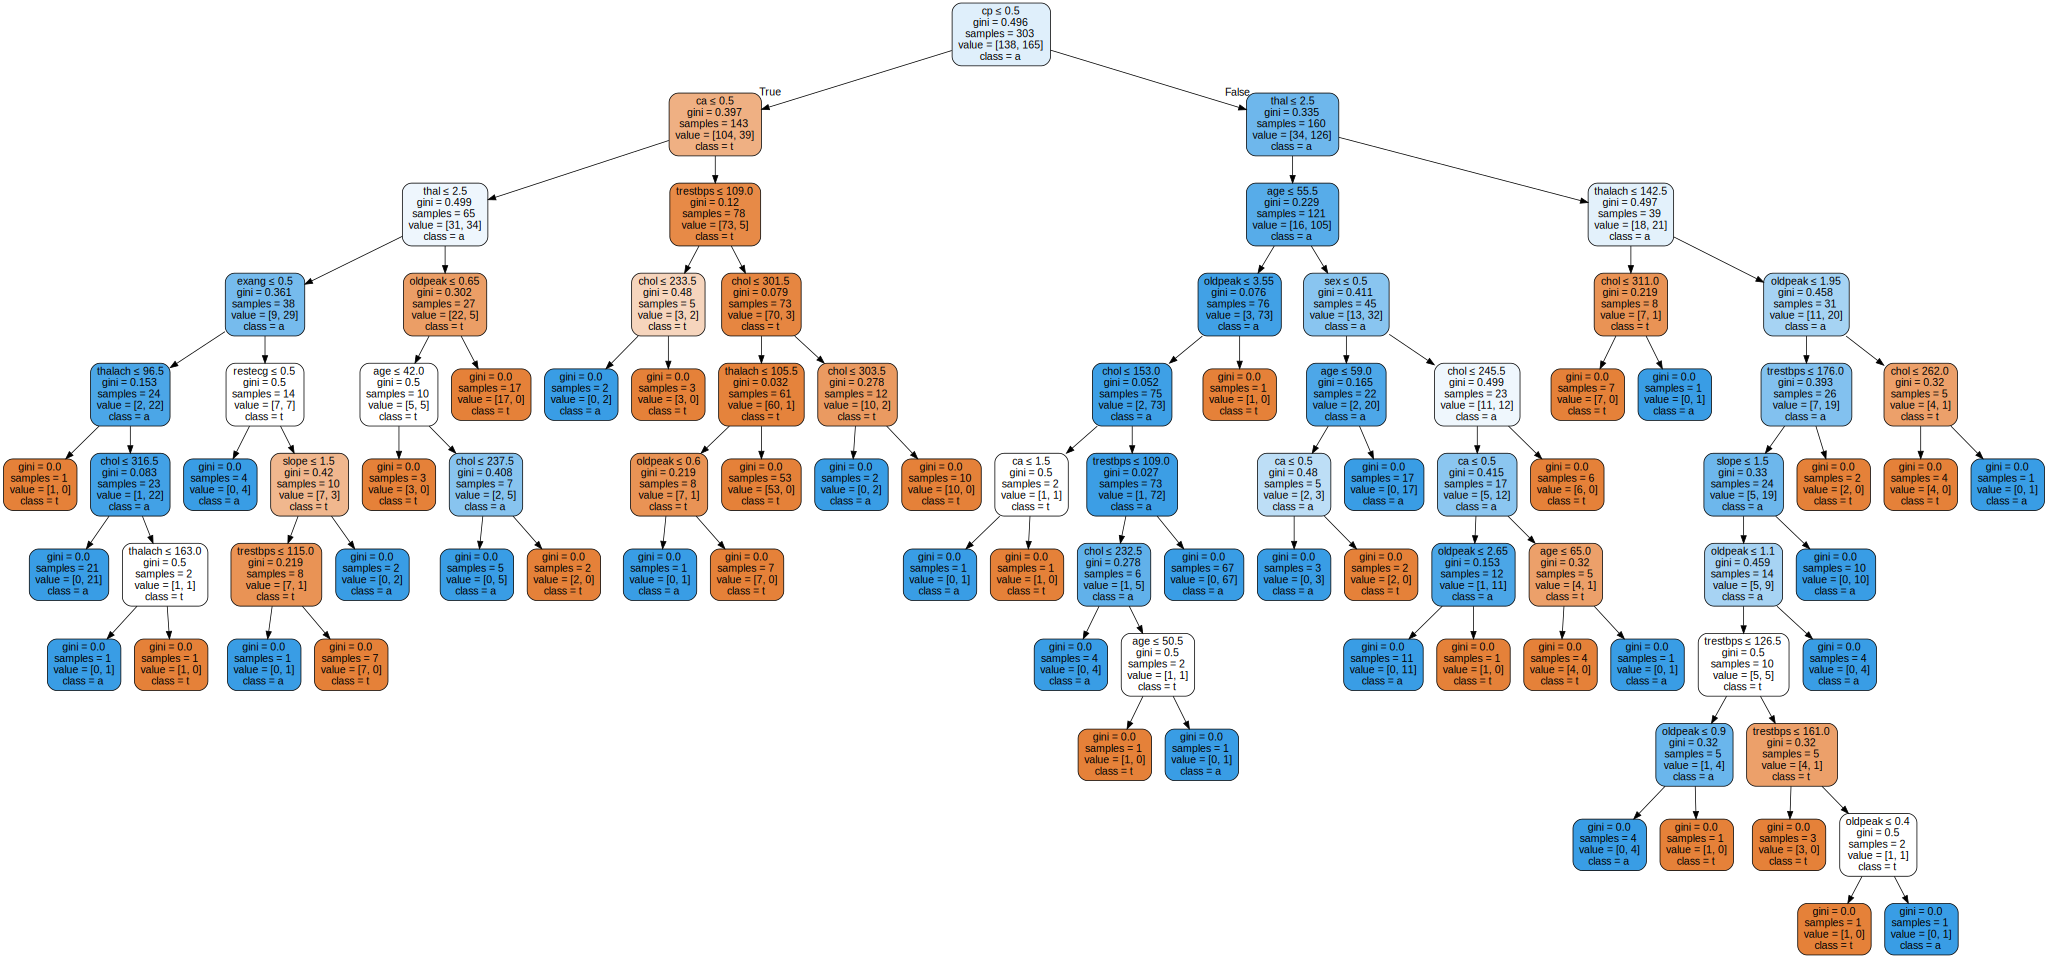

In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree")

dot_data = tree.export_graphviz(clf2, out_file=None, 
                     feature_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],  
                     class_names='target',  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [26]:
    dump(clf2, 'heart_disease_decisionTree_classifier.joblib') 

['heart_disease_decisionTree_classifier.joblib']